In [194]:
library(tidyverse)
theme_set(theme_bw())
library(sf)
library(ggspatial)
options(jupyter.rich_display=T)

# Lecture 24: Flint water crisis
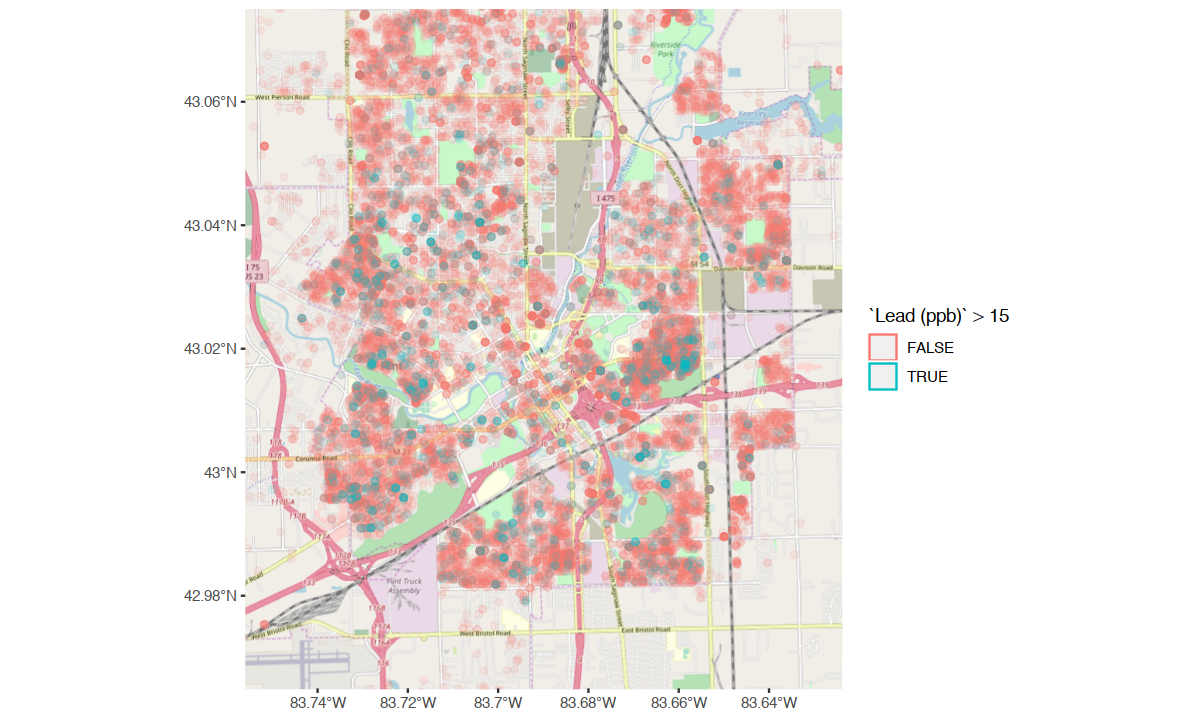

Way back on the first day of class we saw a dataset on water in Flint, MI:

In [176]:
load('../lecture00/flint.RData')
summary(flint)

 Sample Number      Date Submitted                Analysis (Lead)   
 Length:23184       Min.   :2015-09-03 11:05:45   Length:23184      
 Class :character   1st Qu.:2016-02-01 13:27:43   Class :character  
 Mode  :character   Median :2016-02-18 13:07:39   Mode  :character  
                    Mean   :2016-02-29 14:05:42                     
                    3rd Qu.:2016-03-24 13:34:40                     
                    Max.   :2016-06-30 12:40:08                     
                    NA's   :13                                      
   Lead (ppb)       Analysis (Copper)   Copper (ppb)       Street #        
 Min.   :    0.00   Length:23184       Min.   :    0.0   Length:23184      
 1st Qu.:    0.00   Class :character   1st Qu.:    0.0   Class :character  
 Median :    1.00   Mode  :character   Median :    0.0   Mode  :character  
 Mean   :   17.09                      Mean   :   98.7                     
 3rd Qu.:    3.00                      3rd Qu.:  100.0              

Now we have learned many new techniques for studying this data set. This lecture will explore some of them. This lecture is based on the nice paper written by UM students and professors:

https://arxiv.org/pdf/1707.01591.pdf

## What predicts lead exposure?
To answer this question we will look at a subset of this data where we have more covariates:

In [180]:
load('flint.RData')
head(flint)

sample_id,Lead_(ppb),parcel_id,Date_Submitted,google_add,Latitude,Longitude,Owner_Type,Land_Value,Land_Improvements_Value,⋯,Ward,PRECINCT,CENTRACT,CENBLOCK,SL_Type,SL_Type2,SL_Lead,Homestead,Homestead_Percent,HomeSEV
sample_012585,0,parcel_000036,2015-09-25 11:07:30,"1930 Colchester Rd, Flint, MI 48503, USA",42.99412,-83.72384,Private,20173,0,⋯,8,50,003600,6,1,0,0,Yes,100,35000
sample_006656,0,parcel_000036,2016-02-12 13:05:05,"1930 Colchester Rd, Flint, MI 48503, USA",42.99412,-83.72384,Private,20173,0,⋯,8,50,003600,6,1,0,0,Yes,100,35000
sample_007366,0,parcel_004160,2015-09-30 13:06:52,"605 Garland St, Flint, MI 48503, USA",43.02070,-83.69680,Private,15089,85227,⋯,5,32,002800,2,1,0,0,No,0,0
sample_014024,4,parcel_004160,2015-09-30 13:06:51,"605 Garland St, Flint, MI 48503, USA",43.02070,-83.69680,Private,15089,85227,⋯,5,32,002800,2,1,0,0,No,0,0
sample_003639,0,parcel_010786,2015-09-30 13:07:02,"4307 Ogema Ave, Flint, MI 48507, USA",42.98474,-83.66066,Private,7526,0,⋯,9,61,003500,3,1,0,0,Yes,100,0
sample_015176,0,parcel_006659,2015-10-01 11:10:35,"2422 Bassett Pl, Flint, MI 48504, USA",43.03874,-83.72327,Private,787,0,⋯,2,11,000900,4,5,0,1,Yes,100,7100


## Spatial distribution of lead exposure

Let's start by making a map.

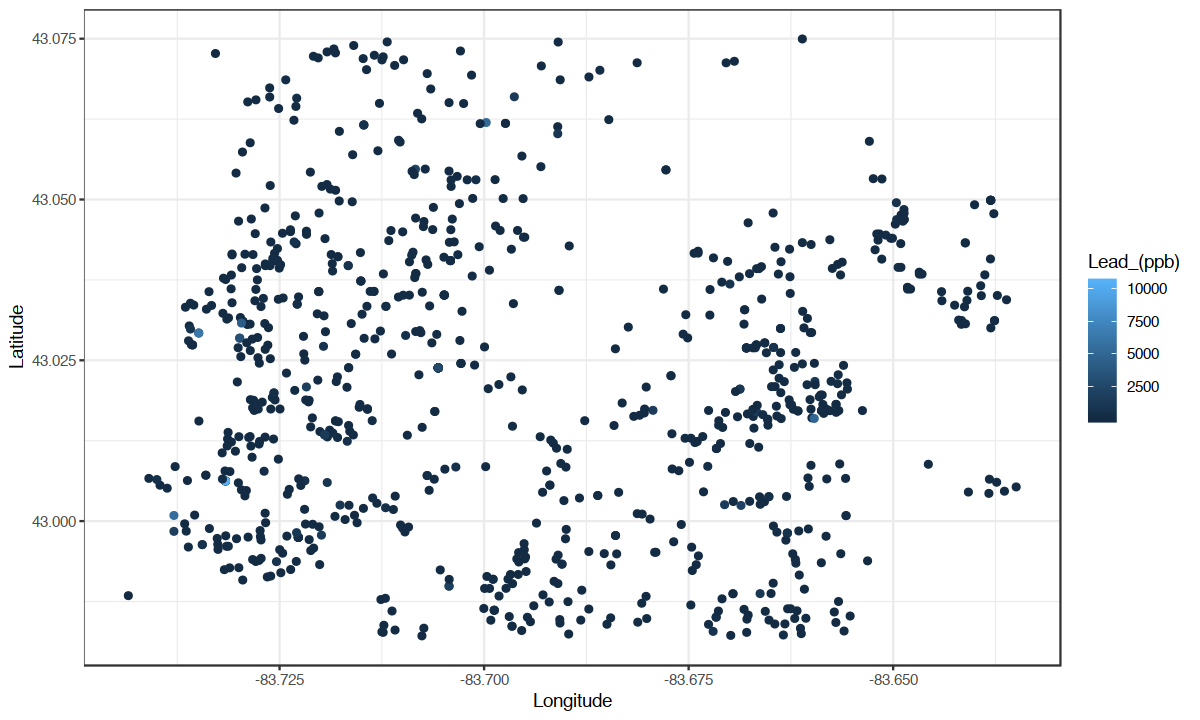

In [213]:
filter(flint, `Lead_(ppb)` > 15) %>% ggplot() + geom_point(aes(x=Longitude, y=Latitude, color=`Lead_(ppb)`))

We can make our map prettier by adding boundaries and other background information:

In [214]:
# this converts our lat-long table into an object that can be plotted on maps using geom_sf()
flint_sf = flint %>% drop_na(Longitude, Latitude) %>%
    st_as_sf(coords = c("Longitude", "Latitude"), crs = 4326, agr = "constant")

Zoom: 11


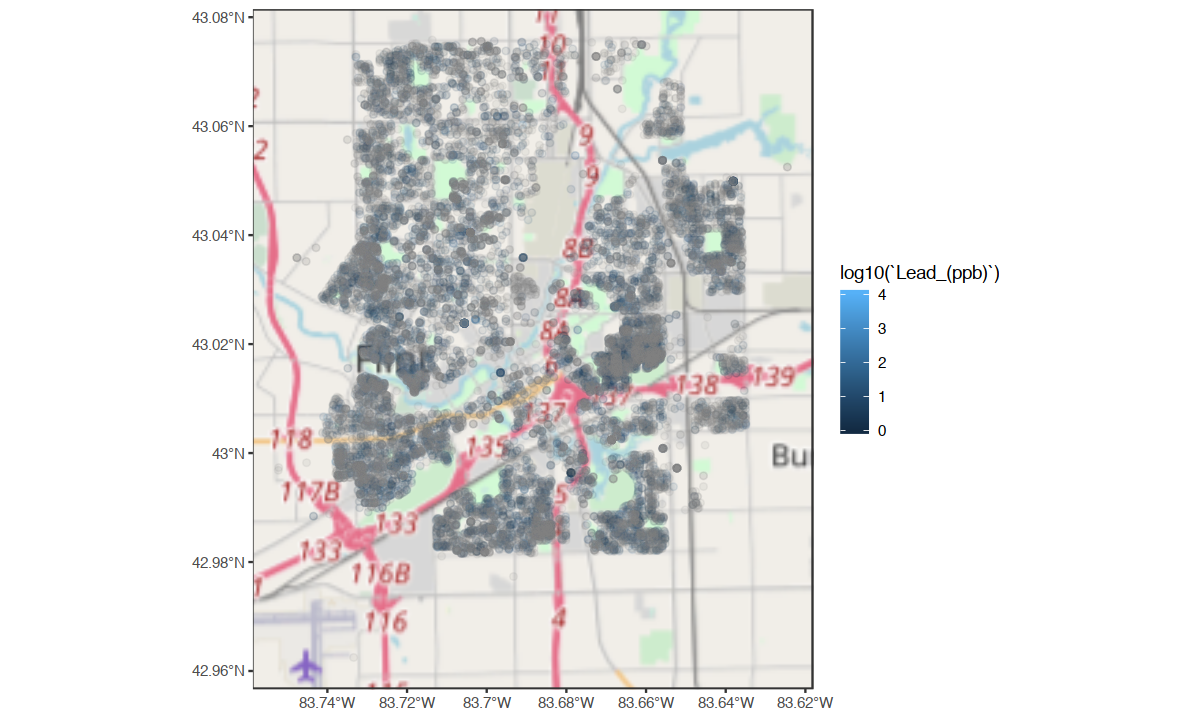

In [ ]:
ggplot(flint_sf) + annotation_map_tile() + geom_sf(aes(color=log10(`Lead_(ppb)`)), alpha=.1)

In [ ]:
filter(flint_sf, `Lead_(ppb)` > 15) %>% ggplot() + annotation_map_tile(zoom=13) + 
    geom_sf(aes(size=`Lead_(ppb)`, color=`Lead_(ppb)`))

I don't see any obvious spatial patterns here. How could we test for spatial uniformity?

In [ ]:
# Solution

## Housing age
How does the age of the home affect lead levels?

In [200]:
# Solution

## Socioeconomic factors
What socioeconomic factors are most correlated with lead exposure?

In [212]:
# Solution
library(tidycensus)